## OCR para obtener texto de Imagen de medicamentos y reproducir oralmente el resultado


Esta pensado como primer paso para generar una API / ENDPOINT para personas no videntes o con problemas de vision. Una vez analizado la imagen se reproduce audio con el texto generado.


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-spa
!pip install gtts
!pip install IPython

In [33]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [135]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class

In [78]:
img = cv2.imread('/content/drive/MyDrive/OCR-medicamento/medicamento.jpeg')

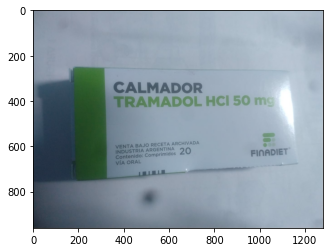

In [82]:
plt.imshow(img)
# VEMOS QUE LA FOTO ES DE BAJA CALIDAD, ENCUADRE Y RESOLUCION.
# AUN ASI EL MODELO INTERPRETA BIEN CASI TODOS LOS CARACTERES


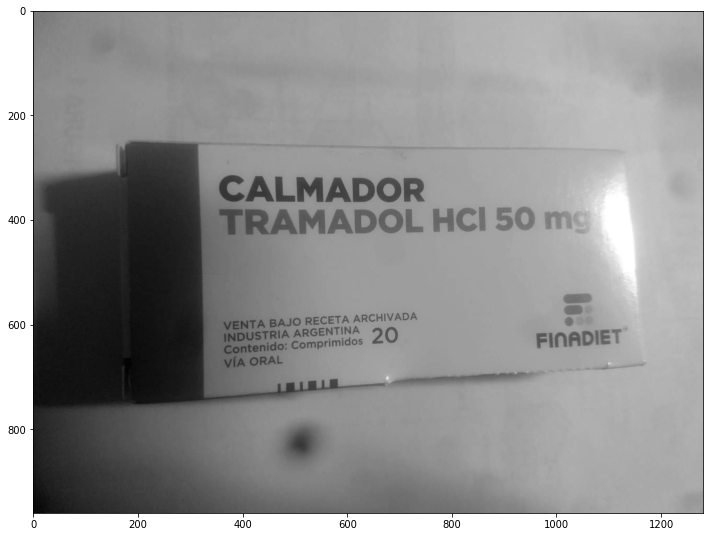

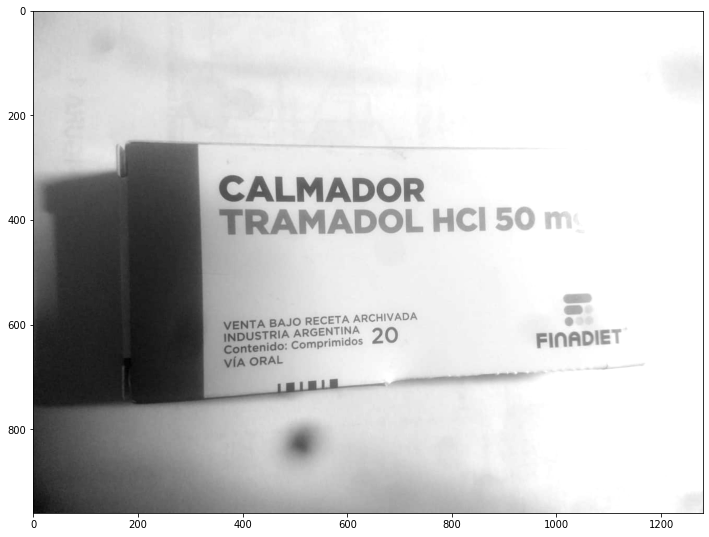

In [161]:
# el treshold es el valor que hay que optimizar
th, threshed = cv2.threshold(gray, 180, 255, cv2.THRESH_TRUNC)
display(gray)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(threshed)

In [162]:
text1 = pytesseract.image_to_data( threshed, lang="eng+spa",output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="eng+spa")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

   
   

CALMADOR
TRAMADOL H

VENTA BAJO RECETA ARCHIVADA

INDUSTRIA ARGENTINA
‘Contenido: Comprimidos 20
FINADIE

| VÍA ORAL



In [163]:
lines

block_num
1                                           [   ,    ]
2                              [CALMADOR, TRAMADOL, H]
3                     [VENTA, BAJO, RECETA, ARCHIVADA]
4    [INDUSTRIA, ARGENTINA, ‘Contenido:, Comprimido...
5                                       [|, VÍA, ORAL]
Name: text, dtype: object

In [164]:
tts = gTTS(text2.lower(),lang="es" ) #Convierte la string a voz
tts.save('1.wav') #guarda la voz como .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True) 

#Autoplay = True para que corra automaticamente